<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [104]:
#Importing the Breast Cancer dataset from Sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [105]:
type(data)

sklearn.utils._bunch.Bunch

In [106]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [107]:
#Checking Shape
data.data.shape
#The output of this will show that there are 30 features and 569 samples

(569, 30)

In [108]:
#The target here is just '0' or '1. If you have 'm' targets then they would be labelled 0.... m - 1

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [109]:
#Target Names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [110]:
data.target.shape

(569,)

In [111]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [112]:
#Splittling the data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.7)
N, D = X_train.shape

In [113]:
#Standardization of the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
#Build the Model
model = nn.Sequential(nn.Linear(D, 1), nn.Sigmoid())

#Loss & Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())


In [115]:
#Convert to Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [126]:
#training the Model

epochs = 200

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for i in range(epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  #backward
  loss.backward()
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()

  if (i + 1) % 20 ==0:
    print(f"Epoch {i + 1}/{epochs} Train Loss: {loss.item():.4f}  Test Loss: {loss_test.item(): .4f}")



Epoch 20/200 Train Loss: 0.2097  Test Loss:  0.2423
Epoch 40/200 Train Loss: 0.2000  Test Loss:  0.2331
Epoch 60/200 Train Loss: 0.1913  Test Loss:  0.2249
Epoch 80/200 Train Loss: 0.1835  Test Loss:  0.2175
Epoch 100/200 Train Loss: 0.1764  Test Loss:  0.2108
Epoch 120/200 Train Loss: 0.1700  Test Loss:  0.2047
Epoch 140/200 Train Loss: 0.1641  Test Loss:  0.1992
Epoch 160/200 Train Loss: 0.1587  Test Loss:  0.1941
Epoch 180/200 Train Loss: 0.1538  Test Loss:  0.1894
Epoch 200/200 Train Loss: 0.1492  Test Loss:  0.1851


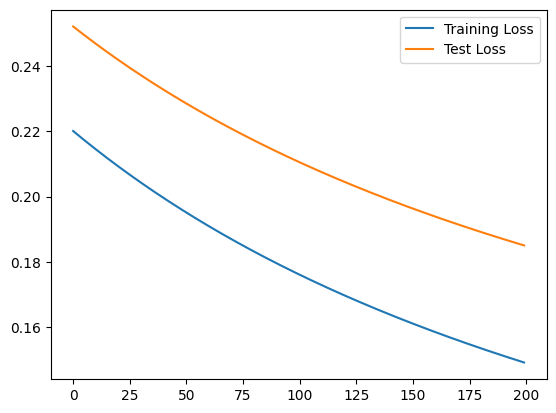

In [127]:
#Plot the Losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')

plt.legend()
plt.show()

In [129]:
#Accuracy

with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9765 Test Accuracy: 0.9449


In [135]:
#State Dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0619, -0.1644, -0.3100, -0.0642, -0.0788, -0.3512, -0.2798, -0.1185,
                       -0.1399,  0.2391, -0.1294, -0.1385, -0.1748, -0.2702,  0.0632, -0.0216,
                        0.1441, -0.1659,  0.0943,  0.2658, -0.0581, -0.2962, -0.0930, -0.3237,
                       -0.3837, -0.2939, -0.1694, -0.2766, -0.1034, -0.0680]])),
             ('0.bias', tensor([0.5012]))])

In [136]:
#Save the Model
torch.save(model.state_dict(), 'pytorch-linear-classification-model.pt')

In [137]:
!ls


pytorch-linear-classification-model.pt	sample_data


In [138]:
#Loading the Model

#First create a new Model
loaded_model = nn.Sequential(nn.Linear(D, 1), nn.Sigmoid())

#Apply the keys
loaded_model.load_state_dict(torch.load('pytorch-linear-classification-model.pt'))

<All keys matched successfully>

In [139]:
#Checking the Model

with torch.no_grad():
  p_train = loaded_model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = loaded_model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9765 Test Accuracy: 0.9449


In [ ]:
#Download the Model
#from google.colab import files
#files.download('pytorch-linear-classification-model.pt')

#Or just download from the File explorer